### CSE 5243 Introduction to Data Mining (AU18)
Updated August 27, 2018, by Michael Burkhardt <burkhardt.5@osu.edu>

# Summary Statistics using the Iris dataset
In this notebook, we'll learn how to do some basic visualizations using the
[Pyplot](https://matplotlib.org/api/pyplot_summary.html) modules of
[Matplotlib](https://matplotlib.org/).
We'll be using the famous [Iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

You may wish to limit the number of decimal places
that Pandas displays. This and other options are documented
[here](https://pandas.pydata.org/pandas-docs/stable/options.html).

In [2]:
pd.options.display.float_format = '{:.2f}'.format
#pd.options.display.float_format = '${:,.2f}'.format

In [ ]:
# If you don't already have a copy of the Iris data file, you can download it here.
IRISURL = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
import urllib
urllib.request.urlretrieve (IRISURL, "data/iris.csv")

In [3]:
iris_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv('data/iris.csv', names=iris_columns)

In [4]:
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,class
72,6.30,2.50,4.90,1.50,Iris-versicolor
15,5.70,4.40,1.50,0.40,Iris-setosa
138,6.00,3.00,4.80,1.80,Iris-virginica
76,6.80,2.80,4.80,1.40,Iris-versicolor
120,6.90,3.20,5.70,2.30,Iris-virginica


## 1. Frequencies and the Mode

As noted in the text:

> Notice [...] that for the Iris data set and the _class_ attribute,
> the three types of flower all have the same frequency, and therefore,
> the notion of a mode is not interesting.

In [5]:
# But here's how you get it anyway:
iris['class'].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: class, dtype: object

In [6]:
# To see the values and counts of all values:
iris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

## 2. Percentiles

In [7]:
# Use the quantile() method to get a quantile on all continuous attributes at once.
iris.quantile(0.5)

sepal_length   5.80
sepal_width    3.00
petal_length   4.35
petal_width    1.30
Name: 0.5, dtype: float64

In [8]:
# Rather than looping, the Pandas describe() method makes this simpler.
# We can pass a list of the percentiles we're interested in.
iris.describe(percentiles=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
0%,4.30,2.00,1.00,0.10
10%,4.80,2.50,1.40,0.20
20%,5.00,2.70,1.50,0.20
30%,5.27,2.80,1.70,0.40
40%,5.60,3.00,3.90,1.16
50%,5.80,3.00,4.35,1.30


In [10]:
# Note: you can also do this using the numpy arange() method(),
# but you'll notice the effects of floating point errors.
iris.describe(percentiles=np.arange(0, 1.1, 0.1))

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
0%,4.30,2.00,1.00,0.10
10%,4.80,2.50,1.40,0.20
20%,5.00,2.70,1.50,0.20
30.0%,5.27,2.80,1.70,0.40
40%,5.60,3.00,3.90,1.16
50%,5.80,3.00,4.35,1.30


In [11]:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

## 3. Measures of Location: Mean and Median

We've already seen how to find the mean and median. (See above.)

It may occasionally be useful to find the trimmed mean, as described in chapter 3. (See note below.) For this, we'll need another library called [SciPy](https://docs.scipy.org/doc/scipy/reference/).

\* Note: The **trimmed mean** is described in §3.2.3 of _Introduction to Data Mining_ (1st ed.) by Tan, et al. This chapter has been omitted from the second edition, but you can download it for free
[here](https://www-users.cs.umn.edu/~kumar001/dmbook/data_exploration_1st_edition.pdf).

In [13]:
from scipy.stats import trim_mean

In [14]:
# Example 3.3
e33 = [1, 2, 3, 4, 5, 90]
print("Median      : %5.2f" % (np.median(e33)))
print("Mean        : %5.2f" % (np.mean(e33)))
print("Trimmed Mean: %5.2f" % (trim_mean(e33, proportiontocut=0.4)))
#trim_mean(e33)

Median      :  3.50
Mean        : 17.50
Trimmed Mean:  3.50


In [15]:
# Example 3.4
tcols = ['Measure', 'mean', 'median', 'trimmed mean (20%)']
df = pd.DataFrame(columns=tcols)
for v in iris_columns[0:4]:
    c = {
        'Measure': v,
        'mean':    iris[v].mean(),
        'median':  iris[v].median(),
        'trimmed mean (20%)': trim_mean(iris[v], 0.2)
    }
    df = df.append(c, ignore_index=True)

# Manipulate the data frame we just built so it's formatted in a way
# similar to Table 3.3
df = df.transpose()
df.columns = iris_columns[0:4]
df.drop(df.index[0], inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.84,3.05,3.76,1.20
median,5.80,3.00,4.35,1.30
trimmed mean (20%),5.80,3.04,3.84,1.20


## 4. Measures of Spread: Range and Variance

In [16]:
# Standard deviation is included in describe() output, but just in case...
iris.std()

sepal_length   0.83
sepal_width    0.43
petal_length   1.76
petal_width    0.76
dtype: float64

In [17]:
# Computing ranges is a bit more cumbersome:
iris_min = iris.min().values[0:4]
iris_max = iris.max().values[0:4]
iris_max-iris_min

array([3.6000000000000005, 2.4000000000000004, 5.9, 2.4], dtype=object)

In [18]:
iris.min()

sepal_length           4.30
sepal_width            2.00
petal_length           1.00
petal_width            0.10
class           Iris-setosa
dtype: object

More robust measures of spread:

In [19]:
# absolute average deviation
def AAD(x,axis=None):  
       mean = np.mean(x,axis=axis)  
       return np.sum(np.abs(x-mean))/(1.0 * len(x))

In [20]:
AAD(iris['sepal_length'])

0.6875555555555557

In [21]:
# median absolute deviation
def MAD(x,axis=None):  
       median = np.median(x,axis=axis)  
       return np.median(np.abs(x-median)) 

In [22]:
MAD(iris['sepal_length'])

0.7000000000000002

In [23]:
# Interquartile range
from scipy.stats import iqr
iqr(iris['sepal_length'])

1.3000000000000007

## 5. Multivariate summary statistics

Given a data set, the mean of the data objects, $\bar{x}$, is given by
$$ \bar{x} = ( \bar{x_1}, ..., \bar{x_n} ) $$
where $\bar{x_i}$ is the mean of the $i^{th}$ attribute $x_i$.

In [24]:
# This just means a list of the means of each of the attributes,
# expressed mathematically as a vector.
print("x_bar = ", iris.mean().values)

x_bar =  [5.84333333 3.054      3.75866667 1.19866667]


In [25]:
# Generating a covariance matrix is easy with Pandas:
iris.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.69,-0.04,1.27,0.52
sepal_width,-0.04,0.19,-0.32,-0.12
petal_length,1.27,-0.32,3.11,1.30
petal_width,0.52,-0.12,1.30,0.58


Recall that covariance$(x_i,x_i)$ is equal to variance$(x_i)$.

Thus, the diagonal contains all the variances of the attributes.

In [26]:
iris.var()

sepal_length   0.69
sepal_width    0.19
petal_length   3.11
petal_width    0.58
dtype: float64

It is not possible to judge the degree of relationship between two variables by looking at the covariance alone. So this is not terribly helpful. For this reason, we often prefer correlation. The values are in the range $[-1,1]$.

In [27]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.11,0.87,0.82
sepal_width,-0.11,1.00,-0.42,-0.36
petal_length,0.87,-0.42,1.00,0.96
petal_width,0.82,-0.36,0.96,1.00


## Measures of Skewness and Kurtosis (tailed-ness)

Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.

Source: [NIST](http://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm)

### Skewness

In [28]:
# Let's load a few distributions
x_norm = np.random.normal(size=10000) # Normal
x_unif = np.random.uniform(size=10000) # Uniform
x_cauchy = np.random.standard_cauchy(10000) # Standard Cauchy
x_weibull = np.random.weibull(1.5, 10000) # Weibull

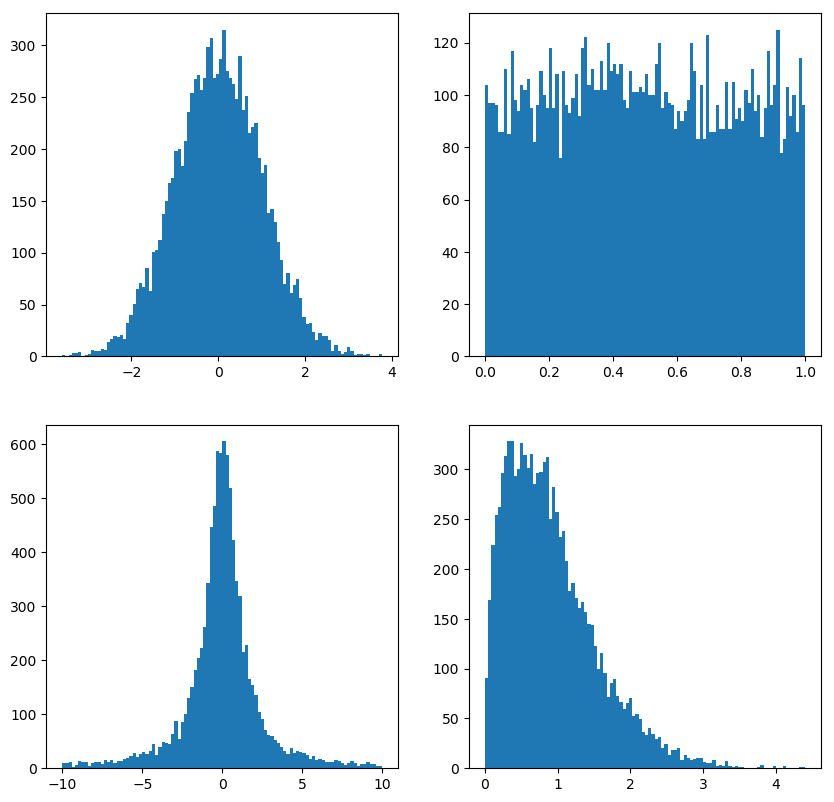

In [29]:
plt.figure(1, figsize=(10,10), dpi=100)

plt.subplot(2,2,1) # nrows, ncols, index (which position?)
plt.hist(x_norm, bins=100)

plt.subplot(2,2,2)
plt.hist(x_unif, bins=100)

plt.subplot(2,2,3)
plt.hist(x_cauchy, bins=100, range=(-10,10))
#plt.hist(x_cauchy, bins=100)

plt.subplot(2,2,4)
plt.hist(x_weibull, bins=100)

plt.show()

In [30]:
from scipy.stats import skew
print("Skew(x_norm): %.6f" % skew(x_norm))
print("Skew(x_unif): %.6f" % skew(x_unif))
print("Skew(x_cauchy): %.6f" % skew(x_cauchy))
print("Skew(x_weibull): %.6f" % skew(x_weibull))

Skew(x_norm): 0.031497
Skew(x_unif): 0.030033
Skew(x_cauchy): 13.095277
Skew(x_weibull): 1.058792


In [31]:
from scipy.stats import kurtosis
print("Kurtosis(x_norm): %.6f" % kurtosis(x_norm))
print("Kurtosis(x_unif): %.6f" % kurtosis(x_unif))
print("Kurtosis(x_cauchy): %.6f" % kurtosis(x_cauchy))
print("Kurtosis(x_weibull): %.6f" % kurtosis(x_weibull))

Kurtosis(x_norm): -0.005389
Kurtosis(x_unif): -1.173091
Kurtosis(x_cauchy): 1844.601426
Kurtosis(x_weibull): 1.279636


In [32]:
x_cauchy.min(), x_cauchy.max()

(-3595.1199480847054, 4286.722108020438)